<a href="https://colab.research.google.com/github/Mastermind0309/NTUH_MDA_Cancer_Center/blob/main/MDA_Table2Bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

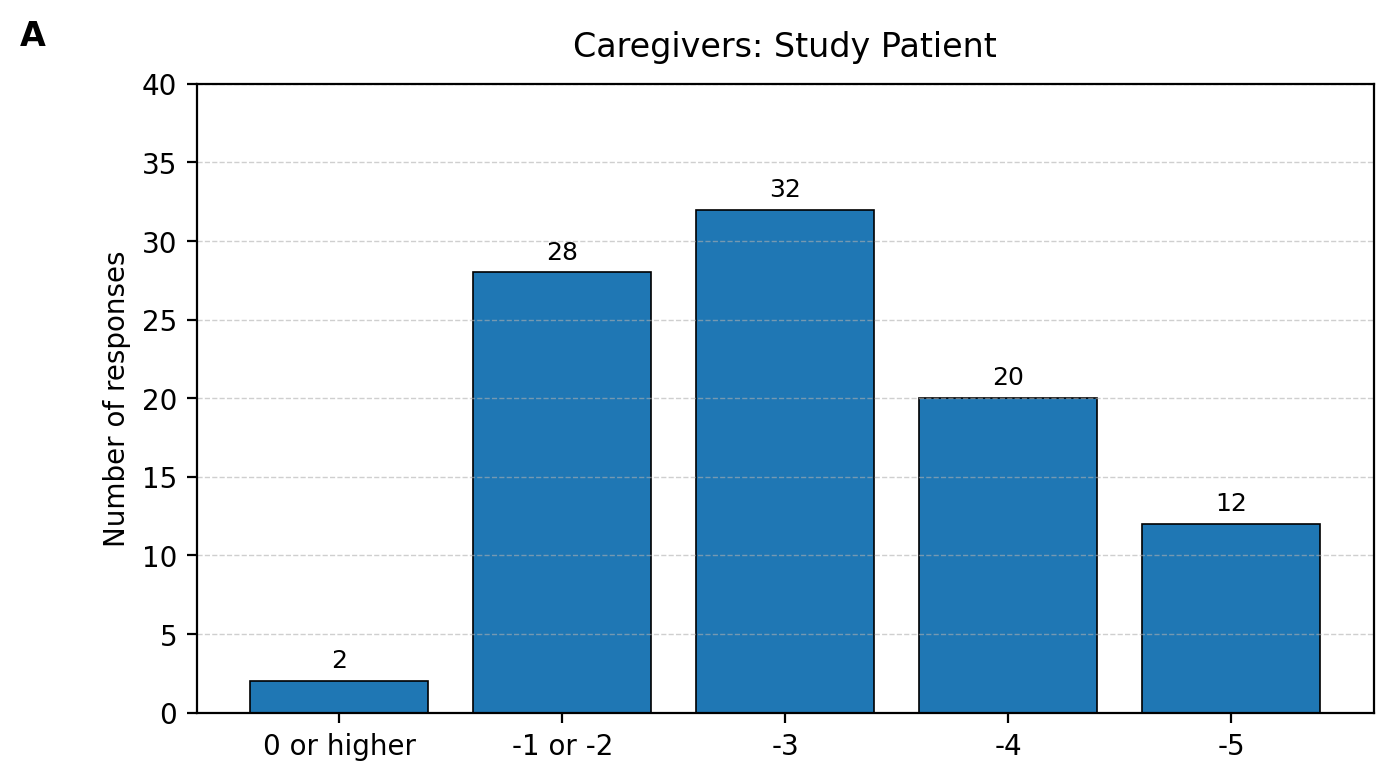

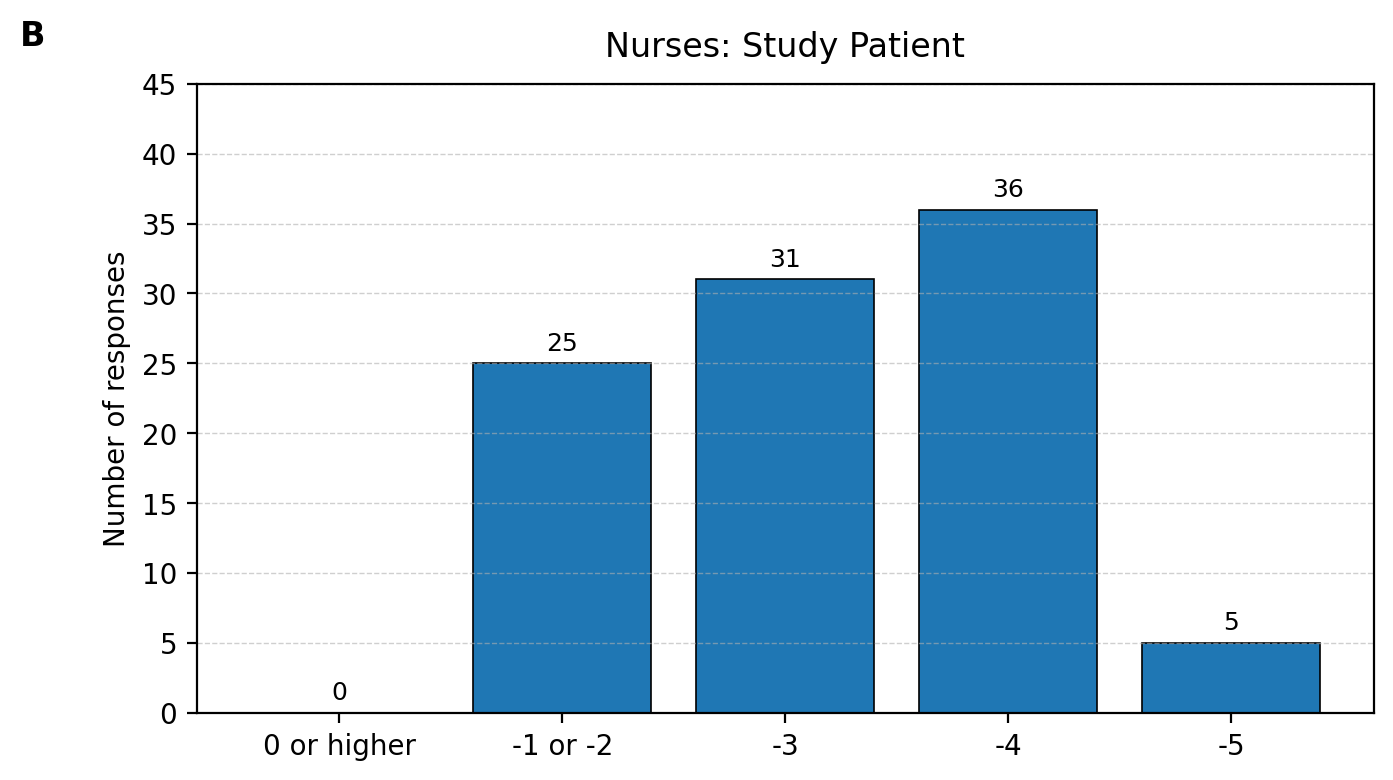

In [ ]:
# -*- coding: utf-8 -*-
# Google Colab-ready: create Figure 1A and 1B with labels outside the frame
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Data from Table 2-1 (Taiwan + USA)
# -----------------------------
categories = ["0 or higher", "-1 or -2", "-3", "-4", "-5"]

# Counts (n)
cg_counts = [2, 28, 32, 20, 12]   # Caregivers (n=94)
rn_counts = [0, 25, 31, 36, 5]    # Nurses (n=97)

# -----------------------------
# 2) Helper to plot a single bar chart
# -----------------------------
def plot_group(title_prefix, group_counts, letter_label, filename):
    x = np.arange(len(categories))
    height = group_counts
    ylim_top = int(np.ceil(max(height) * 1.25 / 5.0) * 5)  # headroom

    fig, ax = plt.subplots(figsize=(7, 4), dpi=200)

    # Color matched to sample (matplotlib default blue)
    bars = ax.bar(
        x, height,
        color="#1f77b4",   # same as your sample chart
        edgecolor="black",
        linewidth=0.6
    )

    # Axis settings
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel("Number of responses")
    ax.set_ylim(0, max(ylim_top, 10))
    ax.set_title(f"{title_prefix}: Study Patient", pad=10)

    # Number labels on bars
    for b in bars:
        h = b.get_height()
        ax.annotate(f"{int(h)}",
                    (b.get_x() + b.get_width()/2, h),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=9)

    # Subtle gridlines
    ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.6)

    # Place panel label (A/B) OUTSIDE the frame — upper left corner
    # (negative offset moves it outside the axes)
    ax.text(-0.15, 1.05, letter_label,
            transform=ax.transAxes,
            fontsize=12, fontweight="bold", va="bottom", ha="left")

    plt.tight_layout()
    plt.show()

    # Save a high-DPI image
    fig.savefig(filename, dpi=600, bbox_inches="tight")

# -----------------------------
# 3) Generate both charts (A and B)
# -----------------------------
plot_group("Caregivers", cg_counts, "A", "A_caregivers_study_patient.png")
plot_group("Nurses", rn_counts, "B", "B_nurses_study_patient.png")
